# Intro to Data Cleaning & Preprocessing with Scikit Learn Transformers

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data splitting

In [12]:
iris = pd.read_csv("iris_codealong.csv", index_col=0)

In [13]:
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   Color  \
Id                                                                     
1             5.1           3.5            1.4           0.2  purple   
2             4.9           3.0            1.4           0.2  yellow   
3             4.7           3.2            1.3           0.2    blue   
4             4.6           3.1            1.5           0.2  purple   
5             5.0           3.6            1.4           0.2    blue   

    StemLengthCm      Species  
Id                             
1       3.636364  Iris-setosa  
2            NaN  Iris-setosa  
3       2.727273  Iris-setosa  
4            NaN  Iris-setosa  
5       1.919192  Iris-setosa

In [14]:
len(iris)

150

In [15]:
iris.isna().sum()

SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Color             0
StemLengthCm     50
Species           0
dtype: int64

In [16]:
iris['StemLengthCm']

Id
1      3.636364
2           NaN
3      2.727273
4           NaN
5      1.919192
         ...   
146    0.101010
147         NaN
148    3.434343
149    8.181818
150         NaN
Name: StemLengthCm, Length: 150, dtype: float64

In [17]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Color             object
StemLengthCm     float64
Species           object
dtype: object

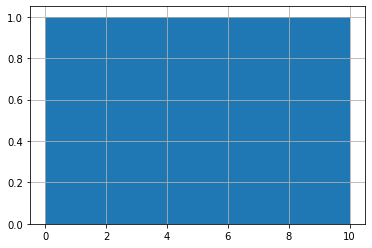

In [24]:
iris['StemLengthCm'].hist(bins=100)

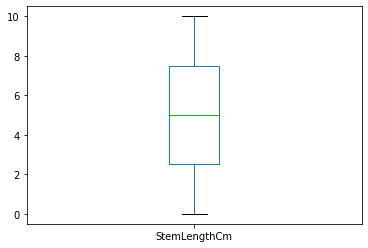

In [22]:
iris['StemLengthCm'].plot.box()

In [25]:
iris['StemLengthCm'].mean()

4.999999999999999

In [26]:
iris.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  StemLengthCm
count     150.000000    150.000000     150.000000    150.000000    100.000000
mean        5.843333      3.054000       3.758667      1.198667      5.000000
std         0.828066      0.433594       1.764420      0.763161      2.930454
min         4.300000      2.000000       1.000000      0.100000      0.000000
25%         5.100000      2.800000       1.600000      0.300000      2.500000
50%         5.800000      3.000000       4.350000      1.300000      5.000000
75%         6.400000      3.300000       5.100000      1.800000      7.500000
max         7.900000      4.400000       6.900000      2.500000     10.000000

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris, test_size=0.2, random_state=123)

In [28]:
train_set.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   Color  \
Id                                                                      
131            7.4           2.8            6.1           1.9  purple   
120            6.0           2.2            5.0           1.5  purple   
30             4.7           3.2            1.6           0.2    blue   
1              5.1           3.5            1.4           0.2  purple   
63             6.0           2.2            4.0           1.0     red   

     StemLengthCm          Species  
Id                                  
131           NaN   Iris-virginica  
120      4.141414   Iris-virginica  
30       5.757576      Iris-setosa  
1        3.636364      Iris-setosa  
63       8.989899  Iris-versicolor

In [29]:
train_set.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  StemLengthCm
count     120.000000    120.000000     120.000000    120.000000     80.000000
mean        5.869167      3.040833       3.820833      1.223333      4.830808
std         0.812900      0.440492       1.728841      0.742552      2.980444
min         4.400000      2.000000       1.000000      0.100000      0.000000
25%         5.100000      2.800000       1.600000      0.400000      2.297980
50%         5.800000      3.000000       4.350000      1.300000      4.696970
75%         6.400000      3.300000       5.100000      1.800000      7.601010
max         7.900000      4.400000       6.900000      2.500000     10.000000

## Do you see anything rare?

In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 131 to 110
Data columns (total 7 columns):
SepalLengthCm    120 non-null float64
SepalWidthCm     120 non-null float64
PetalLengthCm    120 non-null float64
PetalWidthCm     120 non-null float64
Color            120 non-null object
StemLengthCm     80 non-null float64
Species          120 non-null object
dtypes: float64(5), object(2)
memory usage: 7.5+ KB


### Now we will drop the text column so all of them are numerical.

In [36]:
train_labels = iris["Species"]
train_set.drop("Species", axis = 1)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   Color  \
Id                                                                      
131            7.4           2.8            6.1           1.9  purple   
120            6.0           2.2            5.0           1.5  purple   
30             4.7           3.2            1.6           0.2    blue   
1              5.1           3.5            1.4           0.2  purple   
63             6.0           2.2            4.0           1.0     red   
..             ...           ...            ...           ...     ...   
18             5.1           3.5            1.4           0.3  purple   
99             5.1           2.5            3.0           1.1     red   
67             5.6           3.0            4.5           1.5    blue   
127            6.2           2.8            4.8           1.8  yellow   
110            7.2           3.6            6.1           2.5  purple   

     StemLengthCm  
Id                 
131           NaN  
120      4.141414  
30       5.757576  
1        3.636364  
63       8.989899  
..            ...  
18       4.545455  
99       9.898990  
67       4.949495  
127           NaN  
110      0.606061  

[120 rows x 6 columns]

## Fill missing values

**Exercise**: read https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html and figure out how to impute the mean or the median to missing values in "StemLengthCm"

In [34]:
from sklearn.impute import SimpleImputer

# Function for the value replacements

?SimpleImputer

Init signature:
SimpleImputer(
    missing_values=nan,
    strategy='mean',
    fill_value=None,
    verbose=0,
    copy=True,
    add_indicator=False,
)
Docstring:     
Imputation transformer for completing missing values.

Read more in the :ref:`User Guide <impute>`.

Parameters
----------
missing_values : number, string, np.nan (default) or None
    The placeholder for the missing values. All occurrences of
    `missing_values` will be imputed.

strategy : string, optional (default="mean")
    The imputation strategy.

    - If "mean", then replace missing values using the mean along
      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
    - If "constant", then replace missing values with fill_value. Can be
      use

In [38]:
train_num['StemLengthCm'].mean()

4.830808080808081

In [39]:
train_set.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Color             object
StemLengthCm     float64
Species           object
dtype: object

In [41]:
# I'll show how we'd do it for all numerical features
train_num = train_set.select_dtypes(include=["float64"])

# we 'initiate' the transformer
imputer = SimpleImputer(strategy="mean")

# we use its 'fit_transform' method on the selected features of the training set
# 'fit' in this case means looking for the mean in each selected feature
# 'transform' means actually replacing NANs with the mean
X = imputer.fit_transform(train_num)
# transform output back to dataframe 
# (not needed for modelling, but it might help if you have to keep exploring)
train_num = pd.DataFrame(X,
                         columns=train_num.columns,
                         index=train_num.index)
train_num.head(20)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  StemLengthCm
Id                                                                         
131            7.4           2.8            6.1           1.9      4.830808
120            6.0           2.2            5.0           1.5      4.141414
30             4.7           3.2            1.6           0.2      5.757576
1              5.1           3.5            1.4           0.2      3.636364
63             6.0           2.2            4.0           1.0      8.989899
94             5.0           2.3            3.3           1.0      1.717172
132            7.9           3.8            6.4           2.0      4.343434
6              5.4           3.9            1.7           0.4      2.828283
17             5.4           3.9            1.3           0.4      0.505051
83             5.8           2.7            3.9           1.2      5.656566
61             5.0           2.0            3.5           1.0      0.808081
36             5.0           3.2            1.2           0.2      4.830808
144            6.8           3.2            5.9           2.3      4.830808
146            6.7           3.0            5.2           2.3      0.101010
143            5.8           2.7            5.1           1.9      4.830808
115            5.8           2.8            5.1           2.4      4.830808
137            6.3           3.4            5.6           2.4      4.830808
54             5.5           2.3            4.0           1.3      0.404040
20             5.1           3.8            1.5           0.3      2.020202
39             4.4           3.0            1.3           0.2      5.858586

In [42]:
train_num['StemLengthCm'].mean()

4.830808080808081

Now we do it on the test set. Important to understand that we don't want to 'fit' the transformer again! We just want to replace the NAN's with the value we already decidid (in this case the mean). We'll make sure everyone understands why! 

Optional reading: https://medium.com/@chipk215/are-you-unknowingly-data-snooping-when-training-your-ml-models-7d6a70bdff1b

Extra example: in a 'production' setting, it's likely you won't have to make predictions on any 'set' of observations, you'll make predictions on individual observations (you can't take the mean to fill NAN's there). We're trying to replicate the conditions we'll have in 'production' to see whether or not we can produce a model capable of making good generalizations.

In [44]:
# select only numerical features
test_num = test_set.select_dtypes(include=["float64"])

# the imputer's already created and fitted. we just need to use the .transform() method 
# to fill Nan's with the mean
test_X = imputer.transform(test_num)
# transform output back to dataframe 
# (not needed for modelling, but it might help if you have to keep exploring)
test_num = pd.DataFrame(test_X,
                         columns=test_num.columns,
                         index=test_num.index)

test_num.head(20)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  StemLengthCm
Id                                                                         
73             6.3           2.5            4.9           1.5      8.383838
113            6.8           3.0            5.5           2.1      6.868687
133            6.4           2.8            5.6           2.2      7.474747
89             5.6           3.0            4.1           1.3      3.535354
38             4.9           3.1            1.5           0.1      6.969697
139            6.0           3.0            4.8           1.8      7.272727
88             6.3           2.3            4.4           1.3      4.830808
43             4.4           3.2            1.3           0.2      0.303030
9              4.4           2.9            1.4           0.2      8.787879
91             5.5           2.6            4.4           1.2      0.909091
142            6.9           3.1            5.1           2.3      6.060606
34             5.5           4.2            1.4           0.2      4.830808
60             5.2           2.7            3.9           1.4      4.830808
117            6.5           3.0            5.5           1.8      4.444444
136            7.7           3.0            6.1           2.3      4.830808
105            6.5           3.0            5.8           2.2      9.696970
37             5.5           3.5            1.3           0.2      6.161616
14             4.3           3.0            1.1           0.1      4.830808
64             6.1           2.9            4.7           1.4      4.830808
46             4.8           3.0            1.4           0.3      6.767677

In [45]:
train_num['StemLengthCm'].mean()

4.830808080808081

In [46]:
test_num['StemLengthCm'].mean()

5.394781144781145

# Summary

Beware with nans. The replacement decision will impact for sure the outcome of the analysis. Most common reactions;
+ delete all rows with nans.
+ Replace by zeroes.
+ Replace by the average or median (Imputer).

If the replacement is done based on actual data distribution, make sure not to cheat yourself. You shouldn't use test data for that. If you then need to extrapolate the replacement to the test dataset then you must use the value concluded as per the training dataset.

## What about if we didn't want to  replace by the mean?

In [47]:
iris = pd.read_csv("iris_codealong.csv", index_col=0)
iris.isna().sum()

SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Color             0
StemLengthCm     50
Species           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e68b30cd0>,
      dtype=object)

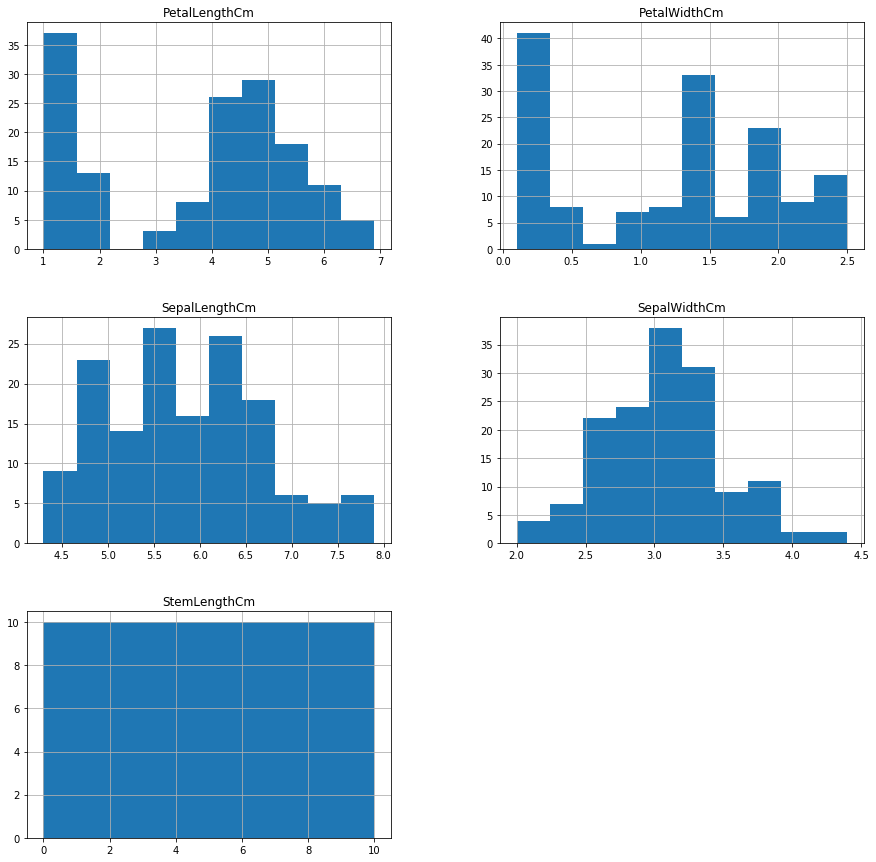

In [48]:
iris.hist(figsize = (15,15))

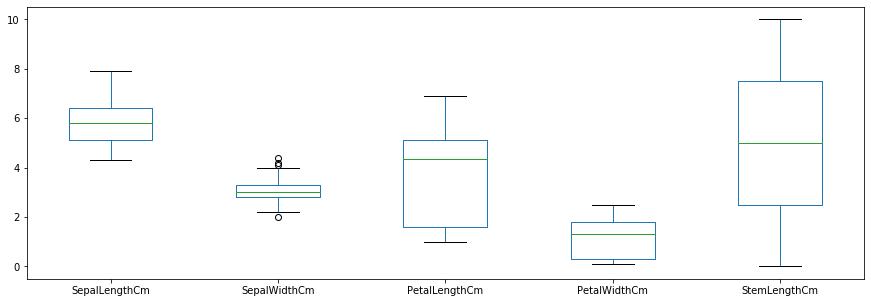

In [49]:
iris.plot.box(figsize = (15,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e69b6e890>,
      dtype=object)

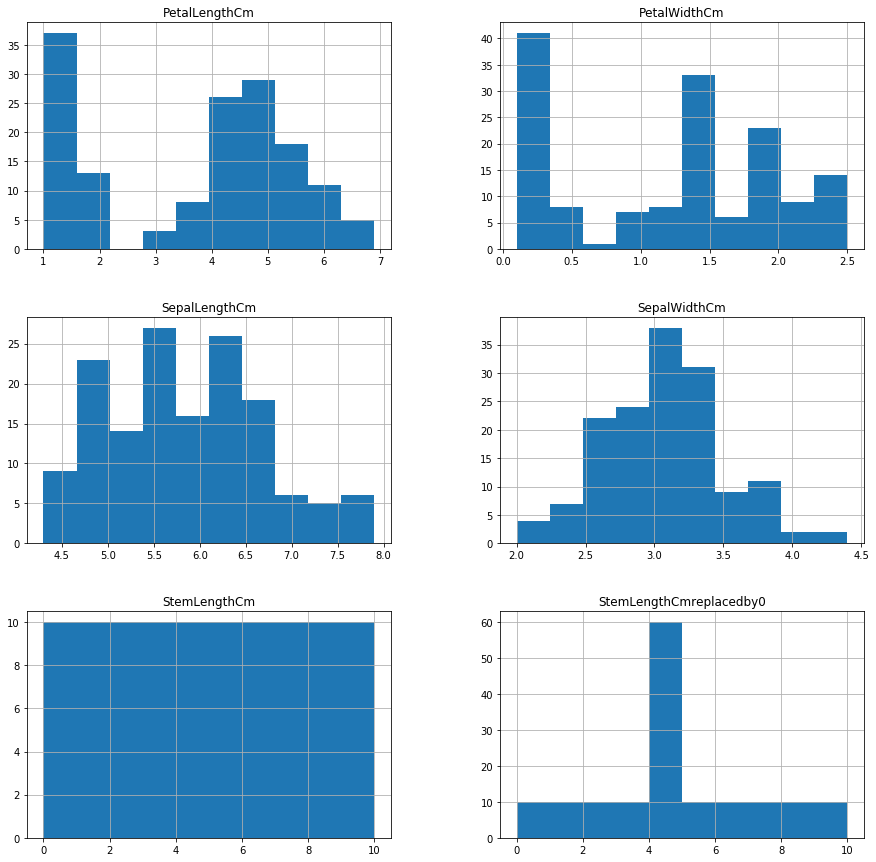

In [51]:
iris['StemLengthCmreplacedby0']=iris['StemLengthCm'].fillna(4.8, inplace = False)
iris.hist(figsize = (15,15))

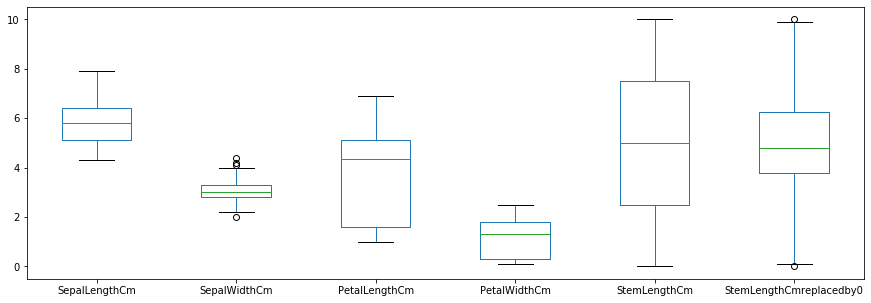

In [52]:
iris.plot.box(figsize = (15,5))